In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_csv('repos/mexico-mortality-master/deaths/deaths08.csv.bz2', compression='bz2')

In [78]:
data['cod'].nunique()

1200

In [3]:
df1 = data[['age', 'sex', 'yod','mod', 'dod',
       'hod', 'minod', 'cod', 'weight']]

In [5]:
df1.head()

,age,sex,yod,mod,dod,hod,minod,cod,weight
0,90,1,2008,1,7,20,15,F17,8888
1,72,1,2008,1,13,14,25,I05,8888
2,49,1,2008,1,12,20,40,K65,8888
3,79,2,2008,1,20,10,30,I38,8888
4,15,1,2008,1,1,15,0,N18,8888


# the goal is to a relationship between age groups and certain diseases

#### first thing to do is clean the dataset

In [4]:
df1.drop( df1[ df1[ 'mod' ] == 0 ].index , inplace=True)

df1.drop( df1[ df1[ 'dod' ] == 0 ].index , inplace=True)

df1.drop( df1[ df1[ 'hod' ] == 0 ].index, inplace=True)

df1.drop( df1[ df1[ 'hod' ] == 99 ].index, inplace=True)

df1.drop( df1[ df1['weight'] == 0 ].index, inplace=True)

df1.drop( df1[ df1['age'] > 99 ].index, inplace=True)

C:\Users\Sanap\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sanap\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sanap\Miniconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [8]:
df1.shape

(507523, 9)

In [5]:
pure_sum=np.array(df1.groupby('age').count()['sex'])

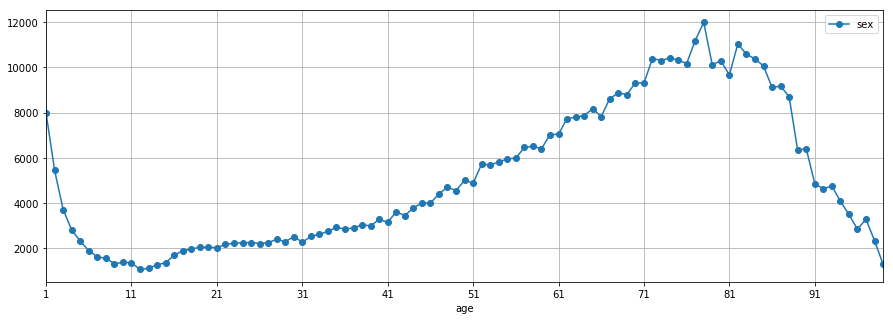

In [6]:
df1.groupby('age').count().plot(y='sex', figsize=(15,5), marker='o')
ax = plt.gca()
ax.set_xticks(np.arange(df1['age'].min(), df1['age'].max()+1, 10))
plt.grid(True)

In [7]:
df2=df1.groupby(['age','cod']).count()

df2.drop(['yod', 'mod', 'dod', 'hod', 'minod', 'weight'], axis=1, inplace=True)

df2.rename(columns={'sex':'freq'}, inplace=True)

In [64]:
df2.head()

freq
age cod      
1   A01     2
    A02     1
    A04     8
    A05     3
    A06     2

In [8]:
topper_list = dict()
age_sum = [] 
for i in df2.index.levels[0]:
    sorted_list=df2.loc[i].freq.argsort
    topper = df2.loc[i].iloc[sorted_list][-10:].index
    age_sum.append(df2.loc[i].iloc[sorted_list][-10:].freq.sum())
    topper_list.update({i:topper})

In [9]:
most_freq = pd.DataFrame(topper_list)

In [23]:
most_freq

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,J98,P24,Q89,E43,P07,Q89,J98,Q21,X59,P77,...,I10,I11,I11,I67,I11,I11,I67,Q89,I10,I11
1,A41,P21,P24,P24,P23,J98,P23,P23,V09,P21,...,I67,I10,I67,I10,E14,E14,E14,E11,E11,E11
2,P21,A09,A41,J98,J98,P23,G80,X59,C91,V09,...,R54,R54,E14,E14,E46,E11,I10,I25,I67,E43
3,Q89,P07,A09,P21,A41,P21,C91,G80,P21,G80,...,E14,E14,E11,E11,E11,E46,E46,E46,E46,E46
4,P36,J98,J98,A41,P21,C91,P21,A09,G80,J18,...,I50,I50,R54,R54,R54,I25,I25,P07,I25,I25
5,A09,A41,P21,A09,A09,A09,A09,C91,J18,C91,...,I25,I25,I25,I25,I25,R54,I50,R54,I50,I50
6,J18,P36,P36,J18,J18,J18,J18,J18,A09,A09,...,J18,E11,I50,I50,I50,I50,R54,I50,J44,R54
7,P07,J18,J18,P36,Q24,Q24,Q24,Q24,Q24,Q24,...,E11,J18,J18,J18,J18,J18,J44,J44,R54,J44
8,Q24,Q24,Q24,Q24,P36,P36,P36,P36,P22,P22,...,J44,J44,J44,J44,J44,J44,J18,J18,J18,J18
9,P22,P22,P22,P22,P22,P22,P22,P22,P36,P36,...,I21,I21,I21,I21,I21,I21,I21,I21,I21,I21


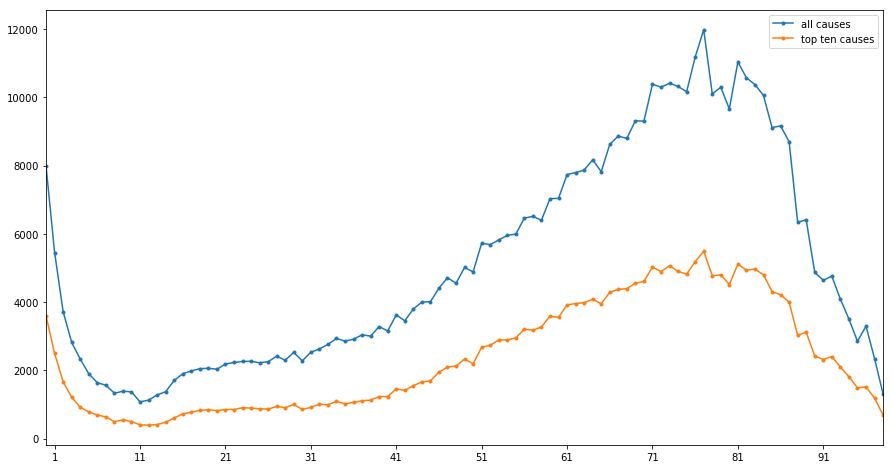

In [11]:
pd.DataFrame({'top ten causes':age_sum, 'all causes':pure_sum}).plot(figsize=(15,8), marker='.')
plt.xticks(np.arange(1,99,10))
plt.show()

##### severity scale: 0-9

In [35]:
causes = []
for i in most_freq.index:
    causes.extend(most_freq.loc[i])

In [36]:
sample = pd.Series(causes)

In [51]:
sample.value_counts()

I21    76
E11    64
E14    60
K70    46
K74    46
X59    42
I25    41
J18    41
J44    40
X95    36
N18    34
V89    27
I50    27
X70    26
V09    24
C34    23
I67    23
B20    22
V87    22
C50    21
P36    20
Q24    17
P22    16
C53    15
I61    15
V49    12
X99    12
R54    12
I11    11
C91    11
A09    11
P21    10
I10     8
G80     8
J98     7
C61     7
C16     6
E46     6
A41     6
C22     5
P23     5
W74     5
I64     4
Q89     4
P07     4
I69     3
P24     3
E43     2
P77     2
Q21     1
K72     1
dtype: int64

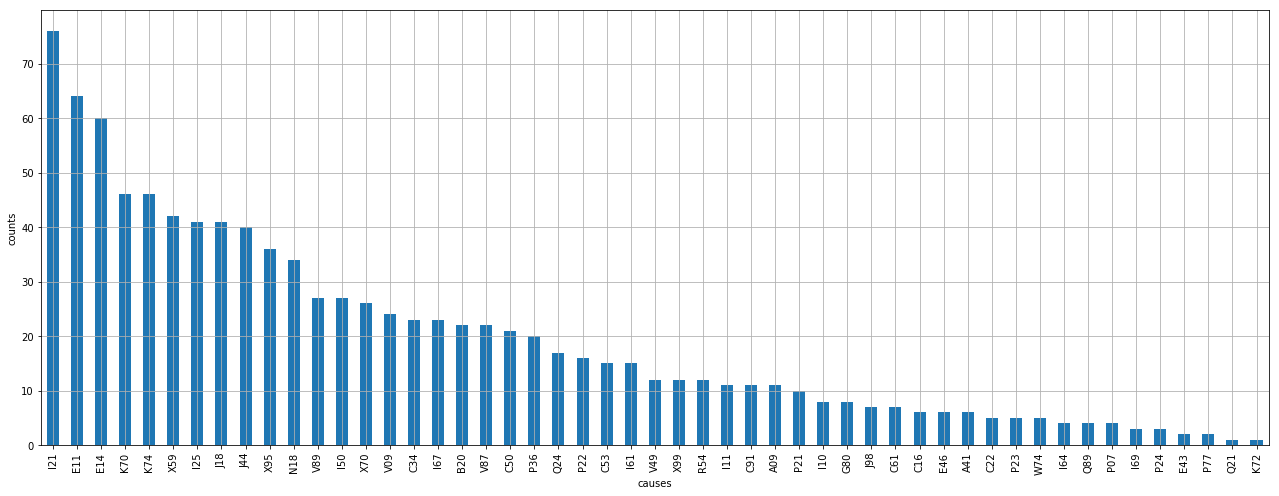

In [59]:
sample.value_counts().plot(kind='bar',figsize=(22,8))
ax=plt.gca()
ax.set_xticks( np.arange ( len ( sample.value_counts() ) ) )
ax.set_xticklabels(sample.value_counts().index)
plt.xlabel('causes')
plt.ylabel('counts')
plt.grid(True)

In [1]:
!conda

usage: conda-script.py [-h] [-V] command ...

conda is a tool for managing and deploying applications, environments and packages.

Options:

positional arguments:
  command
    info         Display information about current conda install.
    help         Displays a list of available conda commands and their help
                 strings.
    list         List linked packages in a conda environment.
    search       Search for packages and display their information. The input
                 is a Python regular expression. To perform a search with a
                 search string that starts with a -, separate the search from
                 the options with --, like 'conda search -- -h'. A * in the
                 results means that package is installed in the current
                 environment. A . means that package is not installed but is
                 cached in the pkgs directory.
    create       Create a new conda environment from a list of specified
                 pac

In [2]:
!conda config --add channels conda-forge